In [10]:
# Matrix plotting from Nilearn: nilearn.plotting.plot_matrix
import numpy as np
import matplotlib.pylab as plt
import glob
import numpy

def plot_matrices(matrices, matrix_kind):
    n_matrices = len(matrices)
    fig = plt.figure(figsize=(n_matrices * 4, 4))
    for n_subject, matrix in enumerate(matrices):
        plt.subplot(1, n_matrices, n_subject + 1)
        matrix = matrix.copy()  # avoid side effects
        # Set diagonal to zero, for better visualization
        np.fill_diagonal(matrix, 0)
        vmax = np.max(np.abs(matrix))
        title = '{0}, subject {1}'.format(matrix_kind, n_subject)
        plotting.plot_matrix(matrix, vmin=-vmax, vmax=vmax, cmap='RdBu_r',
                             title=title, figure=fig, colorbar=False)
        
        
        

In [11]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')

In [23]:
files=glob.glob('/Users/nikkibytes/Documents/niblunc/data/sub-*')
subjects =[]

for f in sorted(files):
    print(f)
    array=numpy.loadtxt(f)
    #print(array)
    subjects.append(array)

/Users/nikkibytes/Documents/niblunc/data/sub-001_punish.txt
/Users/nikkibytes/Documents/niblunc/data/sub-001_reward.txt
/Users/nikkibytes/Documents/niblunc/data/sub-002_punish.txt
/Users/nikkibytes/Documents/niblunc/data/sub-002_reward.txt
/Users/nikkibytes/Documents/niblunc/data/sub-003_punish.txt
/Users/nikkibytes/Documents/niblunc/data/sub-003_reward.txt
/Users/nikkibytes/Documents/niblunc/data/sub-004_punish.txt
/Users/nikkibytes/Documents/niblunc/data/sub-004_reward.txt
/Users/nikkibytes/Documents/niblunc/data/sub-005_punish.txt
/Users/nikkibytes/Documents/niblunc/data/sub-005_reward.txt
/Users/nikkibytes/Documents/niblunc/data/sub-006_punish.txt
/Users/nikkibytes/Documents/niblunc/data/sub-006_reward.txt
/Users/nikkibytes/Documents/niblunc/data/sub-007_punish.txt
/Users/nikkibytes/Documents/niblunc/data/sub-007_reward.txt
/Users/nikkibytes/Documents/niblunc/data/sub-009_punish.txt
/Users/nikkibytes/Documents/niblunc/data/sub-009_reward.txt


In [14]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')

In [19]:
correlation_matrices = correlation_measure.fit_transform(subjects)

# All individual coefficients are stacked in a unique 2D matrix.
print('Correlations of subjects are stacked in an array of shape {0}'
      .format(correlation_matrices.shape))
mean_correlation_matrix = correlation_measure.mean_
print('Mean correlation has shape {0}.'.format(mean_correlation_matrix.shape))

Correlations of subjects are stacked in an array of shape (16, 28, 28)
Mean correlation has shape (28, 28).


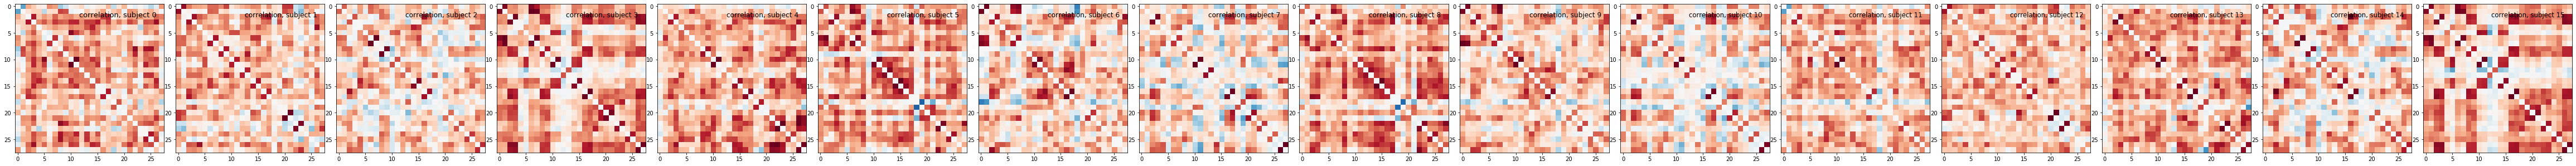

In [24]:
from nilearn import plotting

plot_matrices(correlation_matrices, 'correlation')

In [ ]:
plotting.plot_connectome(mean_correlation_matrix, msdl_coords,
                         title='mean correlation over 13 ADHD subjects')